Hours	0.50  |	0.75  |	1.00  |	1.25  |	1.50  |	 1.75  |   1.75  |  2.00  | 	2.25 |	2.50 |	2.75 |	3.00 |	3.25 |	3.50 |	4.00 |	4.25 |	4.50 |	4.75 |	5.00 |	5.50 |
<br>
Pass	0 |	0 |	0 |	0 |	0 |	0 |	1 |	0 |	1 |	0 |	1 |0 |1 |	0 |	1 |	1 |	1 |	1 |	1 |	1

In general, to do: 1. Link tutorials. 2. comments, doc strings. 3. report 4. questions 

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac <br>
https://predictiveprogrammer.com/machine-learning-from-scratch-logistic-regression/

In [1]:
import numpy as np
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]]) 
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

In [2]:
indices = np.arange(len(X))

In [3]:
print(indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [4]:
np.random.shuffle(indices)

In [5]:
print(indices)

[ 9 18 19  8  0  2 16  3  4 11 14 10 12 13  7 17  6 15  1  5]


In [6]:
X = X[indices]
y = y[indices]

In [7]:
print(X,y)

[[3.25]
 [4.5 ]
 [5.5 ]
 [1.75]
 [0.5 ]
 [1.  ]
 [4.  ]
 [1.25]
 [1.5 ]
 [2.  ]
 [2.75]
 [5.  ]
 [2.25]
 [2.5 ]
 [4.75]
 [4.25]
 [3.  ]
 [3.5 ]
 [0.75]
 [1.75]] [0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0]


In [8]:
X_train, y_train, X_test, y_test = X[:15], y[:15], X[15:], y[15:]

In [9]:
X_train

array([[3.25],
       [4.5 ],
       [5.5 ],
       [1.75],
       [0.5 ],
       [1.  ],
       [4.  ],
       [1.25],
       [1.5 ],
       [2.  ],
       [2.75],
       [5.  ],
       [2.25],
       [2.5 ],
       [4.75]])

## 1. Hypothesis. <br>
The hypothesis function for logistic regression gives outputs between 0 and 1 for all values of X.

In [10]:
def sigmoid(X,theta):
    '''
    Sigmoid function takes in data X and coefficients (weights, bias) theta. Calculates z: dot product of X and theta[0]
    adds theta[1] and returns 1 divided by 1 + element-wise exponential of (-z).

    '''
    z = np.dot(X, theta[0]) + theta[1]
    #print(z)
    return 1 / (1 + np.exp(-z))

# some testing
weights = [np.random.rand(X.shape[1], 1),np.zeros((1,))]
h = sigmoid(X,weights)

In [11]:
weights

[array([[0.69862337]]), array([0.])]

In [12]:
h

array([[0.90640642],
       [0.95866393],
       [0.97900862],
       [0.77251918],
       [0.58645065],
       [0.66788248],
       [0.94237754],
       [0.70542758],
       [0.74037818],
       [0.80174662],
       [0.87227378],
       [0.97049129],
       [0.82805467],
       [0.85151819],
       [0.96505673],
       [0.95116077],
       [0.89050113],
       [0.92020839],
       [0.62807504],
       [0.77251918]])

## 2. Loss function <br>
Loss function is used to measure how well the algorithm is performing. 

In [13]:
def loss_(h, y):
    '''
    Loss function takes in probabilities calculated by the sigmoid (logistic) function and outputs loss according
    to the labels.
    '''
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [14]:
loss_(h, y)

1.1642532489074453

## 3. Gradient descent <br>
Gradient descent is used to update parameters of the model to find the smallest loss (smallest local minimum)

In [15]:
# some testing
gradient = np.dot(X.T, (h - y)) / y.shape[0]

In [16]:
gradient

array([[ 2.49537528, -0.29212472, -0.29212472, -0.29212472,  2.49537528,
         2.49537528, -0.29212472,  2.49537528,  2.49537528,  2.49537528,
        -0.29212472, -0.29212472, -0.29212472,  2.49537528,  2.49537528,
        -0.29212472, -0.29212472, -0.29212472,  2.49537528,  2.49537528]])

In [17]:
def LogisticRegression(X,y,old_theta,alpha,treshold):
    '''
    LogisticRegression takes in data X, targets y, theta old_theta, learning rate alpha and loss treshold. 
    It iteratively updates the coefficients, 
    and stops once the loss function stops changing much. The function outputs coefficients and list of loss
    values after each weight, bias update.
    '''
    loss_list = []

    theta = old_theta.copy()

    # initial loss value
    h = sigmoid(X,theta)
    loss = loss_(h,y)
    loss_update = 0

    index = 0

    # compares loss value and stops once it stop changing by a chosen value
    while(abs(loss-loss_update)> treshold):
    #while(index<50):
            # updates coefficients
            gradient = np.dot(X.T, (h - y)) / y.shape[0]
            theta[0] -= alpha * gradient
            theta[1] -= alpha * np.mean(h-y)
            
            #updates probabilities
            h = sigmoid(X,theta)
            
            loss = loss_update
            loss_update=loss_(h,y)
            loss_list.append(loss_update)
            #print([loss,loss_update])
            
            index+=1


    print('GD stopped at loss %s, with coefficients: %s' % (loss,theta), 'index', index)
    return theta,loss_list

In [18]:
old_theta = [np.random.rand(X_train.shape[1]),np.zeros((1,))]
learning_rate = 0.5
loss_treshold = 0.001
theta, loss = LogisticRegression(X_train,y_train,old_theta,learning_rate,loss_treshold)

GD stopped at loss 0.5702101753271549, with coefficients: [array([0.48991188]), array([-1.34212625])] index 39


In [19]:
theta

[array([0.48991188]), array([-1.34212625])]

In [20]:
loss

[0.6704788957636176,
 0.6645437671883095,
 0.6589803930835816,
 0.6537072115709123,
 0.6487029034135862,
 0.643952724099472,
 0.6394432044124126,
 0.6351615818061206,
 0.6310957303501349,
 0.6272341366848901,
 0.623565879408356,
 0.6200806075051014,
 0.616768517976422,
 0.613620332932594,
 0.6106272764548923,
 0.6077810514697484,
 0.6050738168402359,
 0.6024981648402181,
 0.6000470991435102,
 0.5977140134312697,
 0.5954926706959104,
 0.5933771832985522,
 0.5913619938190295,
 0.5894418567224261,
 0.5876118208535961,
 0.5858672127608843,
 0.5842036208419417,
 0.5826168802978933,
 0.5811030588768983,
 0.5796584433841455,
 0.5782795269323443,
 0.5769629969046515,
 0.5757057236005593,
 0.5745047495344425,
 0.5733572793561184,
 0.5722606703628068,
 0.5712124235722268,
 0.5702101753271549,
 0.5692516894025488]

## Evalution on test set

In [21]:
y_pred = sigmoid(X_test, theta)

In [22]:
y_pred

array([0.67699569, 0.53185912, 0.59207871, 0.27394621, 0.38112393])

In [23]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print (y_pred)

[1. 1. 1. 0. 0.]


Mean squared error: 0.00


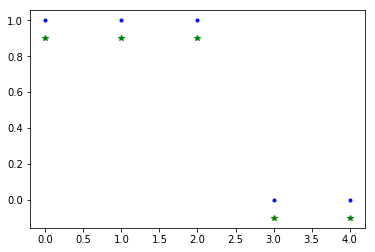

In [24]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


plt.plot(y_test - 0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()


plt.show()

In [25]:
import pandas as pd
results_data = {'True':y_test, 'Predicted':y_pred}
results = pd.DataFrame(results_data,columns = ['True','Predicted'])

In [26]:
results

,True,Predicted
0,1,1.0
1,1,1.0
2,1,1.0
3,0,0.0
4,0,0.0


In [27]:
print ("ACCURACY = ",(y_pred== y_test).mean())

ACCURACY =  1.0
